In [1]:
import json
import requests
import re
from IPython import display
from datetime import datetime
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

TODO: Upload data to Google Firebase so as to not use up limited OpenDota calls and also just in case the site is down
TODO: Code that checks how recent the data/request is in Firebase compared to OpenDota. Perhaps a "SYNC" function

C:\Users\johnp\Documents\ESportsAnalytics\esportsanalytics-3b04cf0c1d47.json

In [2]:
# Use a service account
if not firebase_admin._apps:
    cred = credentials.Certificate(r'C:\Users\johnp\Documents\ESportsAnalytics\esportsanalytics-3b04cf0c1d47.json')
    firebase_admin.initialize_app(cred)

In [3]:
db = firestore.client()

In [4]:
db.project

'esportsanalytics'

In [5]:
# delete data
# db.collection(u'users').document(u'alovelace').delete()

In [6]:
BASE_URL = 'https://api.opendota.com/api/'
TEAMS = 'teams'
MATCHES = 'matches'

In [7]:
def get_full_teams_info():
    response = requests.get(BASE_URL + TEAMS)
    
    try:
        team_data_json = json.loads(response.content.decode('utf-8'))
    
    except requests.exceptions.Timeout:
        print('request is taking too long to complete, possible timeout please retry')
    
    except requests.exceptions.RequestException as e:
        raise SystemExit(e)
    
    return team_data_json

In [8]:
def get_team_matches(team_id):
    response = requests.get(BASE_URL + TEAMS + '/' + str(team_id) + '/' + MATCHES)
    
    try:
        team_matches_json = json.loads(response.content.decode('utf-8'))
    
    except requests.exceptions.Timeout:
        print('request is taking too long to complete, possible timeout please retry')
    
    except requests.exceptions.RequestException as e:
        raise SystemExit(e)
    
    return team_matches_json

In [9]:
def get_match_data(match_id):
    response = requests.get(BASE_URL + MATCHES + '/' + str(match_id))
    
    try:
        match_data_json = json.loads(response.content.decode('utf-8'))
    
    except requests.exceptions.Timeout:
        print('request is taking too long to complete, possible timeout please retry')
    
    except requests.exceptions.RequestException as e:
        raise SystemExit(e)
    
    return match_data_json

In [10]:
full_team_dict = get_full_teams_info()


In [11]:
full_team_dict

[{'team_id': 15,
  'rating': 1603.12,
  'wins': 1554,
  'losses': 937,
  'last_match_time': 1660520088,
  'name': 'PSG.LGD',
  'tag': 'PSG.LGD',
  'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/15.png'},
 {'team_id': 7119388,
  'rating': 1567.57,
  'wins': 284,
  'losses': 215,
  'last_match_time': 1660520088,
  'name': 'Team Spirit',
  'tag': 'TSpirit',
  'logo_url': 'https://steamusercontent-a.akamaihd.net/ugc/1773822957617535601/F40F2155B92321415E972B787C5B1B0FFF06155A/'},
 {'team_id': 7412785,
  'rating': 1520.12,
  'wins': 267,
  'losses': 1,
  'last_match_time': 1639928575,
  'name': 'CyberBonch-1',
  'tag': 'CB',
  'logo_url': 'https://steamusercontent-a.akamaihd.net/ugc/1842537871043985153/774A1838BEB3E73BFDEFEC0EDFD97B4F5C62B838/'},
 {'team_id': 6209166,
  'rating': 1490.59,
  'wins': 484,
  'losses': 401,
  'last_match_time': 1660499174,
  'name': 'Team Aster',
  'tag': 'Aster',
  'logo_url': 'https://steamusercontent-a.akamaihd.net/ugc/162973025316

In [12]:
doc_ref = db.collection(u'dota').document(u'teams')
doc_ref.set({
    'all_teams': full_team_dict
})

update_time {
  seconds: 1660969734
  nanos: 671797000
}

In [13]:
doc_ref = db.collection(u'dota').document(u'teams')

In [14]:
x = doc_ref.get().

SyntaxError: invalid syntax (1178515419.py, line 1)

In [ ]:
doc = doc_ref.get()
if doc.exists:
    print(f'Document data: {doc.to_dict()}')
else:
    print(u'No such document!')

In [ ]:
doc.to_dict()

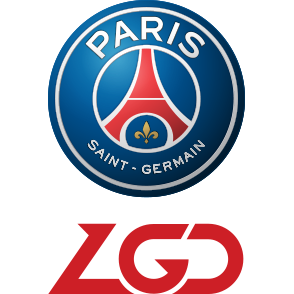

In [15]:
display.Image('https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/15.png', width = 100, height = 100)

In [ ]:
len(full_team_dict)

In [ ]:
PSG_LGD_matches = get_team_matches(15)

In [ ]:
PSG_LGD_matches

In [ ]:
len(full_team_matches)

In [ ]:
test = []
for x in full_team_matches:
    if x['leagueid'] == 12929:
        test.append(x['match_id'])

In [ ]:
len(test)

In [ ]:
full_team_matches[0]

In [ ]:
ts = full_team_matches[0]['start_time']

In [ ]:
datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
match_data = get_match_data(full_team_matches[0]['match_id'])

In [ ]:
match_data['dire_score']